<a href="https://colab.research.google.com/github/ll3091/ANLY-580-01-NLP-Project/blob/master/ModelEvaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP Project: Model Evaluation

In [1]:
# connect to Google Drive
from google.colab import drive

drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [2]:
# move to results folder
% cd ./gdrive/'My Drive'/NLPProject/ModelTrainingOutput

/content/gdrive/My Drive/NLPProject/ModelTrainingOutput


In [0]:
# import packages
import json
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
# collect file names
files = os.listdir()

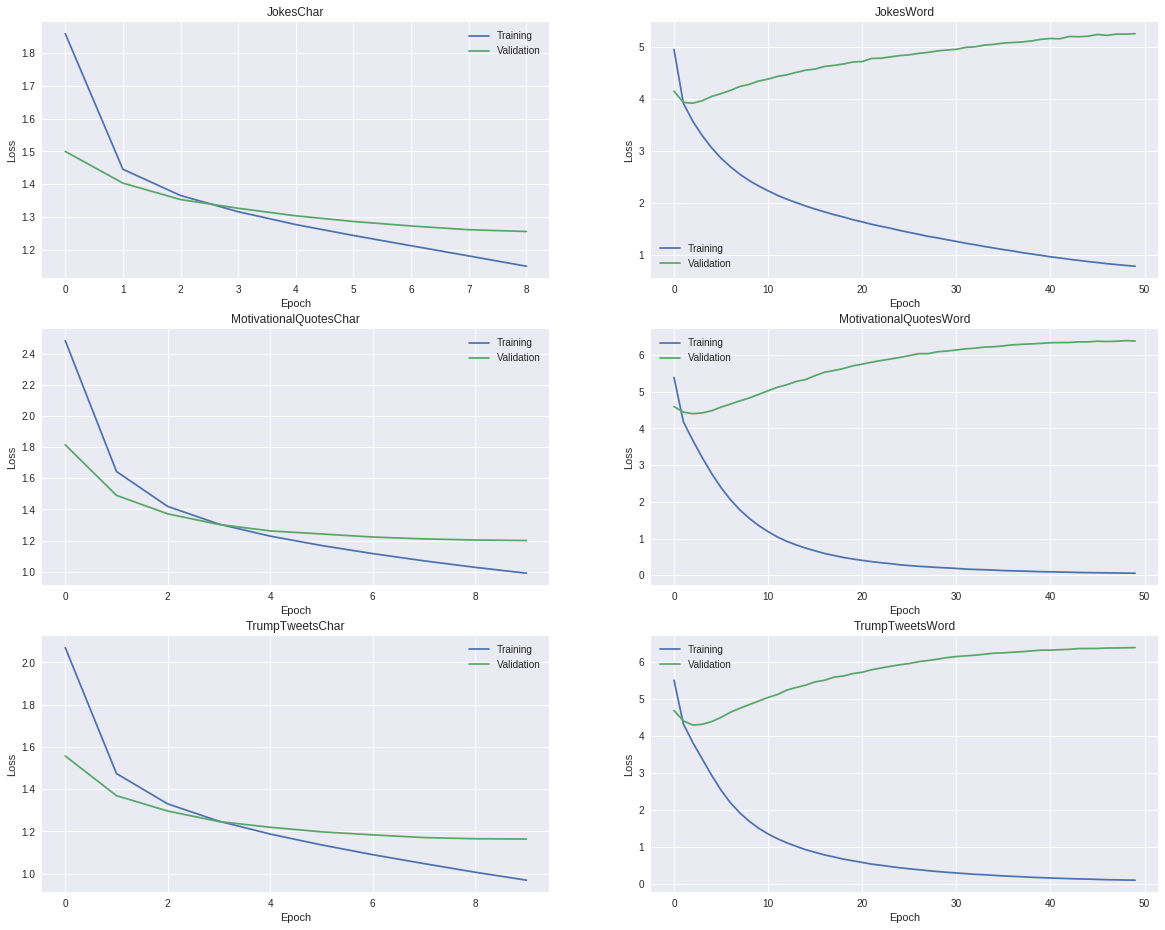

In [6]:
# extract and plot model loss
plt.figure(figsize=(20, 16))
ind = 1
for f in sorted(files):
  loss = []
  val_loss = []
  with open(f, 'r', encoding = 'utf-8') as inputTxt:
    lines = inputTxt.readlines()
    for l in lines:
      if len(l)>30:
        if '==============================' in l:
          losses = re.findall("\d+\.\d+", l)
          if len(losses)==2:
            loss.append(float(losses[0]))
            val_loss.append(float(losses[1]))
  plt.subplot(len(files)/2, 2, ind) 
  plt.plot(loss, label = 'Training')
  plt.plot(val_loss, label = 'Validation')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.title(f.replace('.txt', ''))
  plt.legend()
  ind +=1
plt.show()          

# Generate Text from Trained Models

In [11]:
% cd ../TrainedModels
! ls

char_jokes_config.json		       word_jokes_config.json
char_jokes_vocab.json		       word_jokes_vocab.json
char_jokes_weights.hdf5		       word_jokes_weights.hdf5
char_motivational_quotes_config.json   word_motivational_quotes_config.json
char_motivational_quotes_vocab.json    word_motivational_quotes_vocab.json
char_motivational_quotes_weights.hdf5  word_motivational_quotes_weights.hdf5
char_trump_tweets_config.json	       word_trump_tweets_config.json
char_trump_tweets_vocab.json	       word_trump_tweets_vocab.json
char_trump_tweets_weights.hdf5	       word_trump_tweets_weights.hdf5


In [12]:
# source https://github.com/minimaxir/textgenrnn
! pip install textgenrnn
from textgenrnn import textgenrnn

    100% |████████████████████████████████| 1.7MB 11.0MB/s 
  Running setup.py bdist_wheel for textgenrnn ... - \ done
  Stored in directory: /root/.cache/pip/wheels/30/96/f7/bc7042ea671bc79455c244af21050a7a32d604fe2f7a44e322
Successfully built textgenrnn


Using TensorFlow backend.


In [0]:
weights_path='char_jokes_weights.hdf5'
vocab_path='char_jokes_vocab.json'
config_path='char_jokes_config.json'

In [15]:
textgen = textgenrnn(weights_path=weights_path,
                       vocab_path=vocab_path,
                       config_path=config_path)

textgen.generate_samples(max_gen_length=100)
textgen.generate_to_file('textgenrnn_texts.txt', max_gen_length=1000)

####################
Temperature: 0.2
####################
he doctor said, "I want to start a big deal and she was a pregnant and said, "I want to be the same 

ant to go to the bathroom and the best thing the man was standing at the bottom of the conversation 

xcited the bartender and asks the blonde, "What did he say when he could be a blonde and said, "I wa

####################
Temperature: 0.5
####################
as a big chauvinist."
	
	The next day the man says, "I want to be a pig to my family car." 
	
	"And 

 it for a while.

The Child: A passenger asked a boy who was the best way to a hot dog and give the 

want to have a new boyfriend."
	
	"I've got a hot dog for it."
	
	The teacher asked the class over t

####################
Temperature: 1.0
####################
.: Upon makes waiting growling about what I guess it were being told that all would share halfway ca

rippones several children
	After a million up.

His Bowling: What's the difference between a black m


	#5 - 